In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
class_names = ["octopus", "elephant", "flamingo", "kangaroo", "Leopards", "sea_horse"]

In [3]:
def histogram_generate(image, numPixels, colorMode):
    if(colorMode == "rgb"):
        hist = np.zeros(256)
    else:
        hist = np.zeros(180)
    image = image.ravel()
    
    for pixel in image:
        hist[pixel] += 1
        
    return hist/numPixels

In [4]:
def get_features(image, colorMode):
    features = list()
    height = image.shape[0]
    width = image.shape[1]
    numPixels = height * width
    
    if colorMode == "rgb":
        hist_red = histogram_generate(image[:,:,0], numPixels, colorMode)
        hist_green = histogram_generate(image[:,:,1], numPixels, colorMode)
        hist_blue = histogram_generate(image[:,:,2], numPixels, colorMode)
        features.append(hist_red)
        features.append(hist_green)
        features.append(hist_blue)
        return np.array(features).ravel()

    
    else:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)  
        hist_hue = histogram_generate(image[:,:,0], numPixels, colorMode)
        return np.array(hist_hue)



In [5]:
images_train = []
images_test = []
for class_name in class_names:
    images = [cv2.imread(file) for file in glob.glob("dataset/{}/*.jpg".format(class_name))]
    images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]
    images_train.append(images[0:20:])
    images_test.append(images[20:30:])
    
images_train = np.array(images_train, dtype=np.ndarray).ravel()
images_test = np.array(images_test, dtype=np.ndarray).ravel()

In [6]:
train_rgb = [get_features(image, "rgb") for image in images_train]
train_hue = [get_features(image, "hue") for image in images_train]

test_rgb = [get_features(image, "rgb") for image in images_test]
test_hue = [get_features(image, "hue") for image in images_test]

In [7]:
def euclidian_distance(test_rgb, train_rgb, size):
    scores = np.zeros((60, 120))

    for i in range(60):
        for j in range(120):
            sum_euclid = 0
            for k in range(size):
                sum_euclid += (test_rgb[i][k] - train_rgb[j][k]) ** 2          
            sum_euclid = (sum_euclid) ** (1/2)
            scores[i][j] = sum_euclid
    
    return scores

In [8]:
scores_rgb = euclidian_distance(test_rgb, train_rgb, 768)
scores_hue = euclidian_distance(test_hue, train_hue, 180)

In [9]:
def most_similar(scores):
    best_idx = np.zeros((60, 5))
    for i in range(60):
        for j in range(5):
            index = np.argmin(scores[i])
            scores[i][index] = 10
            best_idx[i][j] = index
    
    return best_idx

In [10]:
similar_rgb = most_similar(scores_rgb).astype(np.uint8)
similar_hue = most_similar(scores_hue).astype(np.uint8)

[51 95 33 19 25]
[ 70   3 115  21 107]
[19 72 25 51 11]
[26 63 34 21 23]
[ 2 14  9 39 10]
[110  11 114  93  28]
[ 21  63 115 107  23]
[31 65 24 25 51]
[100 119 103  48 107]
[ 52 112  10   9  14]


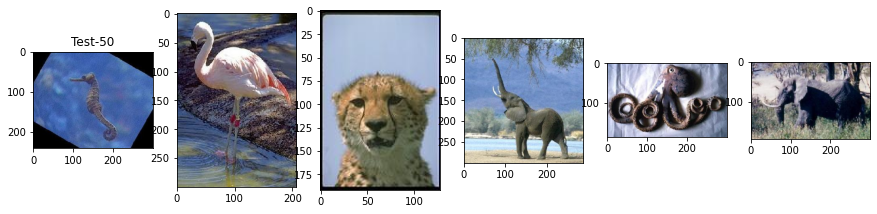

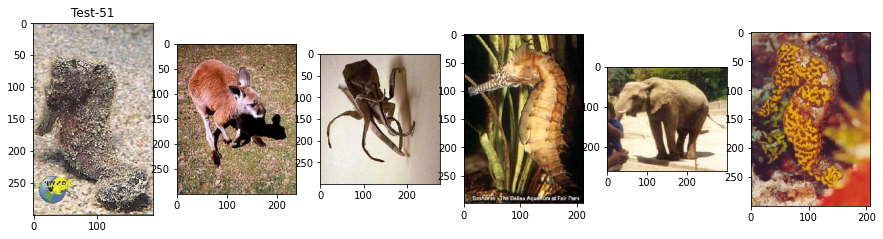

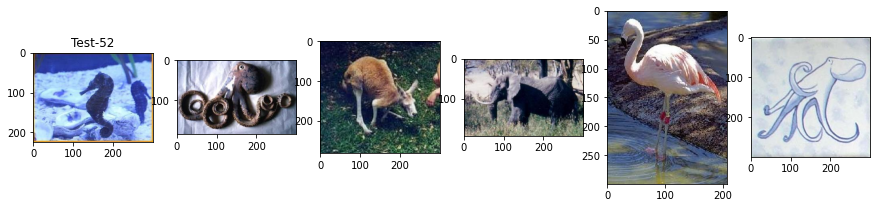

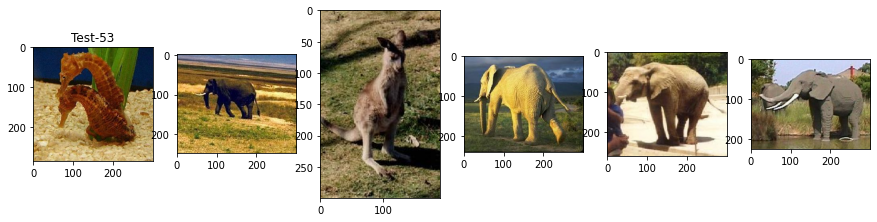

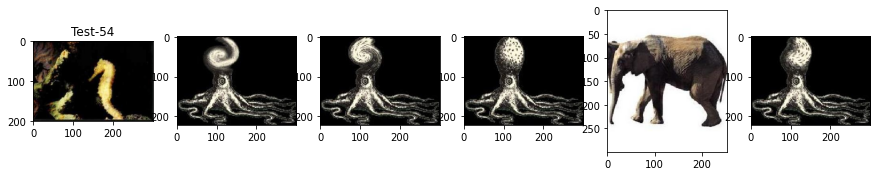

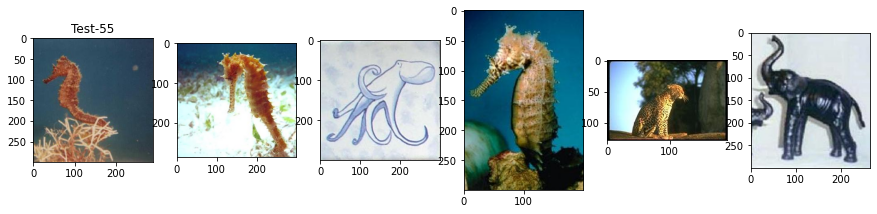

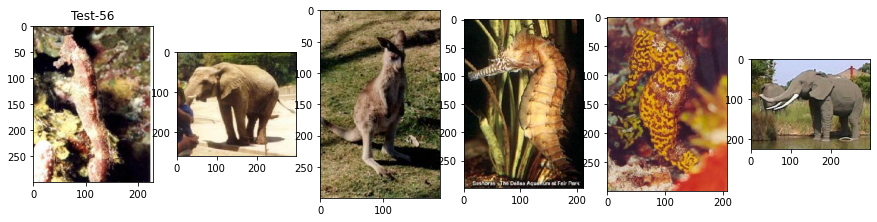

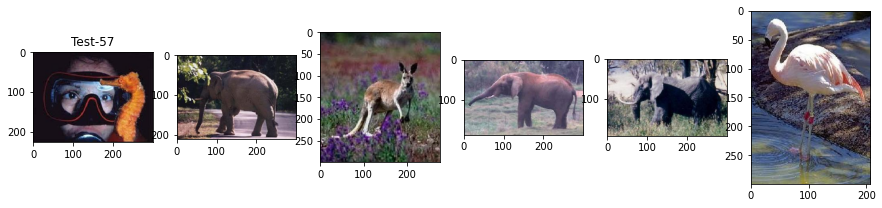

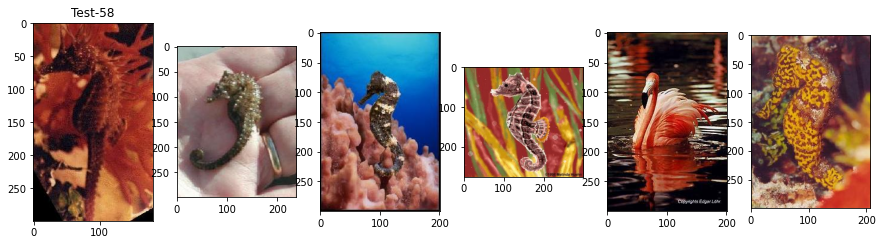

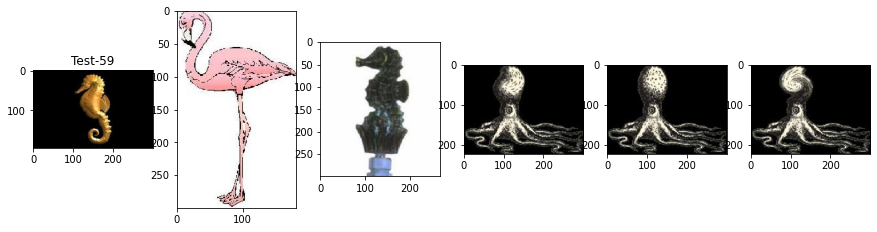

In [11]:
# range i 10 aralikli olarak 60 a kadar degistir
# rgb resimler icin similar_rgb hsvler icin similar_hueyi array olarak ver
for i in range(50,60):
    fig, axs = plt.subplots(1,6)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    idx = similar_hue[i]
    print(idx)
    axs[0].imshow(images_test[i])
    axs[0].set_title("Test-{}".format(i))
    for j in range(len(idx)):
        axs[j+1].imshow(images_train[idx[j]], cmap='gray')